Chapter 2 in Dive into Data Science by Bradford Tuckfield
----

In [ ]:
#import pandas and give it the alias pd

import pandas as pd
carsales=pd.read_csv('carsales.csv')
print(carsales.head())

     Month  Monthly car sales in Quebec 1960-1968
0  1960-01                                 6550.0
1  1960-02                                 8728.0
2  1960-03                                12026.0
3  1960-04                                14395.0
4  1960-05                                14587.0


In [ ]:
#First, we can see the column names. The column names in this dataset are Month
#and Monthly car sales in Quebec 1960-1968. The second column name will be
#easier to work with if we shorten it.

#access the columns of our dataframe and redefine them to have shorter names (month and sales, respectively)

carsales.columns= ['month','sales']
print(carsales.tail())

                                     month    sales
104                                1968-09  14385.0
105                                1968-10  21342.0
106                                1968-11  17180.0
107                                1968-12  14577.0
108  Monthly car sales in Quebec 1960-1968      NaN


In [ ]:
# use the pandas loc() method to specify a selection of rows that we want to keep: in this case,
#all the rows between row 0 and row 107, inclusive. We use the colon (:)
#after the comma to indicate that we want to keep
#both of the dataset’s columns. We store the result in our carsales variable,
#thereby removing the superfluous row 108

carsales=carsales.loc[0:107,:].copy()
carsales['period']=list(range(108))
print(carsales.tail())

       month    sales  period
103  1968-08  16722.0     103
104  1968-09  14385.0     104
105  1968-10  21342.0     105
106  1968-11  17180.0     106
107  1968-12  14577.0     107


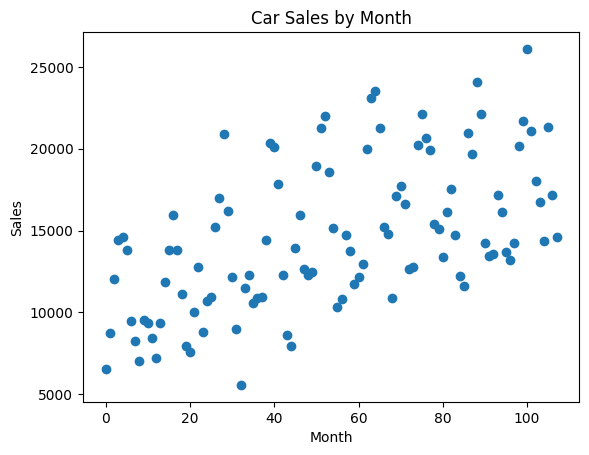

In [ ]:
#Plotting Data to Find Trends (34)

#n this snippet, we import the Matplotlib pyplot module and give it the alias plt.
#Then, we use the scatter() method to create a scatterplot of
#all the sales numbers in our data, organized by period (month). We also
#use a few lines to add axis labels and a plot title and then show the plot.

from matplotlib import pyplot as plt
plt.scatter(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Performing Linear Regression: finds a line that captures a noisy relationship between variables,
#and we can use that line to make predictions about things we’ve never seen.

#We’ll use methods for linear regression that are very
#particular about the shape of the data we use, meaning whether sales
#numbers are stored as 108 rows × 1 column or 108 columns × 1 row

x = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


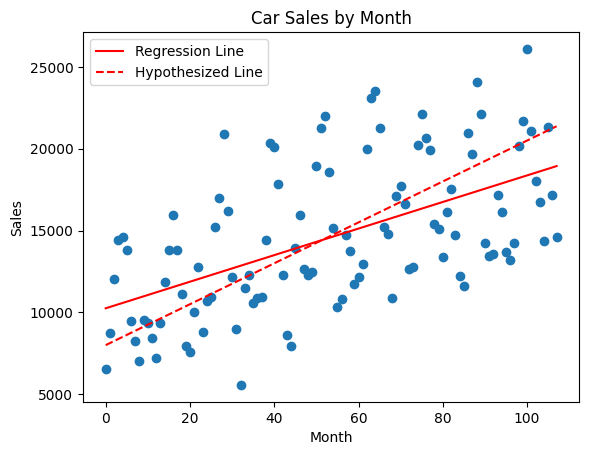

In [ ]:
# Applying Algebra to the Regression Line (38)

# this new line our hypothesized line. If we use it as a model of
#our data, we have a new m and b, and so we have a new interpretation.
#In particular, the slope of this line is 125, which we would interpret as
#an expectation that monthly car sales will increase by about 125 every
#month—significantly higher than 81.2, the estimate from our regression line.

plt.scatter(carsales['period'],carsales['sales'])
plt.plot(carsales['period'],[81.2 * i + 10250.8 for i in \
carsales['period']],'r-',label='Regression Line')
plt.plot(carsales['period'],[125 * i + 8000 for i in
carsales['period']],'r--',label='Hypothesized Line')
plt.legend(loc="upper left")
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Calculating Error Measurements (40)

#we create saleslist, a variable that includes the raw car sales numbers for every month.
# Then we create two variables, regressionline and hypothesizedline.
#These variables record every point on the regression and hypothesized lines, respectively.
#We want to measure how far each true sales number is from both of these lines,
#so we create two more variables: error1 to record the distance between true sales numbers
#and the regression line, and error2 to record the distance between true sales numbers
#and the hypothesized line.

saleslist=carsales['sales'].tolist()
regressionline=[81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline=[125 * i + 8000 for i in carsales['period']]
error1=[(x-y) for x, y in zip(regressionline,saleslist)]
error2=[(x-y) for x, y in zip(hypothesizedline,saleslist)]

print(error1)
print(error2)

[3700.7999999999993, 1604.0, -1612.800000000001, -3900.6000000000004, -4011.4000000000015, -3134.2000000000007, 1240.0, 2568.199999999999, 3851.3999999999996, 1436.5999999999985, 1698.7999999999993, 2688.0, 3988.199999999999, 1932.3999999999996, -449.40000000000146, -2315.2000000000007, -4376.0, -2189.800000000001, 569.3999999999996, 3818.5999999999985, 4264.799999999999, 1941.0, -721.8000000000011, 3302.3999999999996, 1522.5999999999985, 1333.7999999999993, -2838.0, -4566.800000000001, -8375.6, -3599.4000000000015, 543.7999999999993, 3771.0, 7281.199999999999, 1456.3999999999996, 755.5999999999985, 2509.7999999999993, 2312.0, 2290.199999999999, -1068.6000000000004, -6961.4000000000015, -6629.200000000001, -4236.0, 1393.199999999999, 5100.4, 5861.5999999999985, -27.200000000000728, -1950.0, 1439.199999999999, 1881.3999999999996, 1759.5999999999985, -4633.200000000001, -6867.0, -7541.799999999999, -4026.6000000000004, -539.4000000000015, 4410.799999999999, 4006.0, 127.20000000000073, 12

In [ ]:
#In this snippet, we import Python’s NumPy package. NumPy is used
#often in data science, especially for calculations with arrays and matrices.
#Here, we import it because it gives us the ability to find the mean of a list.
#Then we define two new variables: error1abs and error2abs, each containing
#a list of the absolute values of our error measurements for our two respective lines.
#Finally, we take the means of these lists.

import numpy as np
error1abs=[abs(value) for value in error1]
error2abs=[abs(value) for value in error2]

print(np.mean(error1abs))
print(np.mean(error2abs))

#we create lists of the squared values of each error
error1squared=[(value)**2 for value in error1]
error2squared=[(value)**2 for value in error2]

print(np.sqrt(np.mean(error1squared)))
print(np.sqrt(np.mean(error2squared)))

3154.3592592592595
3239.777777777778
3725.491219512759
3968.900519455399


In [ ]:
#simple Python functions that perform calculations of MAE and RMSE:

def get_mae(line,actual):
  error=[(x-y) for x,y in zip(line,actual)]
  errorabs=[abs(value) for value in error]
  mae=np.mean(errorabs)
  return(mae)
def get_rmse(line,actual):
  error=[(x-y) for x,y in zip(line,actual)]
  errorsquared=[(value)**2 for value in error]
  rmse=np.sqrt(np.mean(errorsquared))
  return(rmse)


#can see that the RMSE of our regression line is about 3,725
print(get_rmse(regressionline,saleslist))

#can see that the RMSE of our hypothesized line is about 3,969
print(get_rmse(hypothesizedline,saleslist))

3725.491219512759
3968.900519455399


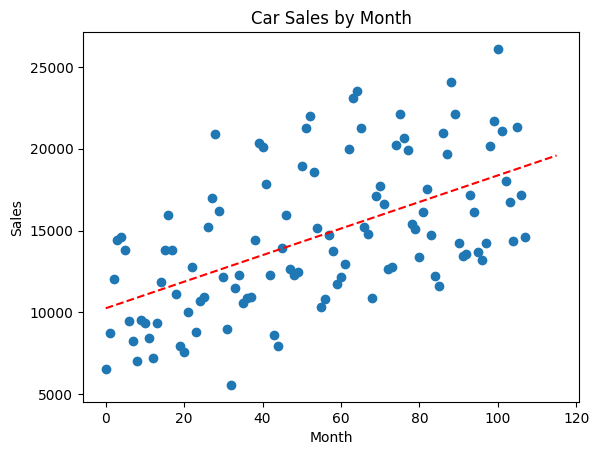

In [ ]:
# Using Regression to Forecast Future Trends (43)

#we create the variable x_extended. This variable is a combination of two sets of numbers.
#First, it includes the values of our dataset’s period column that records the periods from 0 to 107 in order.
#Second, it includes all the numbers 108 through 115 in order—these are meant to represent future
#months after the end of our data (month 108, month 109, . . . all the way to month 115).
#We combine these two things by using the np.append() method,
#and the end result is an extended version of our original x variable.

x_extended = np.append(carsales['period'], np.arange(108, 116))

x_extended=x_extended.reshape(-1,1)
extended_prediction=regressor.predict(x_extended)


#It looks almost identical and it’s supposed to. The only difference is that we’ve extended
#our regression line out a few more periods to the right, to see what car sales
#we expect—that is, how many we forecast—in the near future.

plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x_extended,extended_prediction,'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

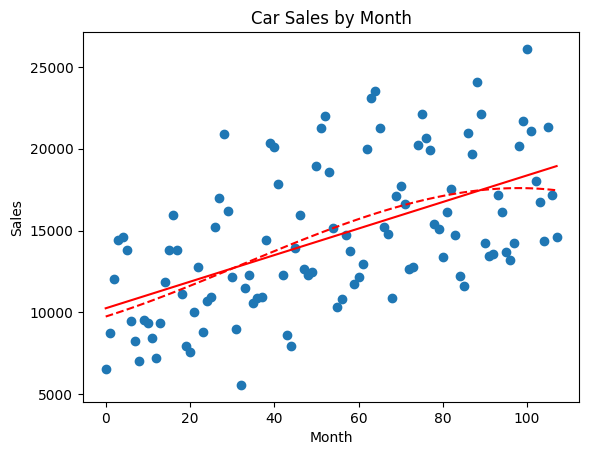

In [ ]:
# Trying More Regression Models (45)

#In this snippet, we define two new variables: quadratic,
#whose value is equal to period2, and cubic, whose value is equal to period3
#we calculate the values predicted by this regression for our data and plot them

carsales['quadratic']=carsales['period'].apply(lambda x: x**2)
carsales['cubic']=carsales['period'].apply(lambda x: x**3)

x3 = carsales.loc[:,['period','quadratic','cubic']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3, y)
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x,regressor.predict(x),'r-')
plt.plot(x,regressor_cubic.predict(x3),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Every time we select different variables for our regression,
#the output will look a little different: it may ave a different shape
#or a different curve. But it will always fit the data.

print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


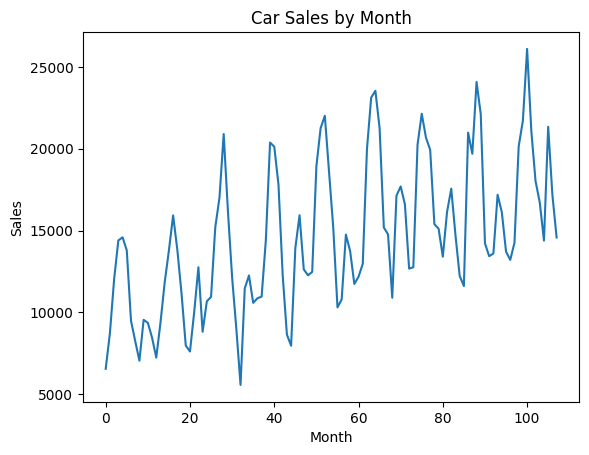

In [ ]:
# Trigonometry to Capture Variations (47)

#This new plot shows the same data, but plotted as a line rather than
#a collection of points. With a line plot, another pattern becomes much
#clearer. We can see that the noisy ups and downs of monthly sales within
#individual years are more ordered than they looked in the scatterplot.

from matplotlib import pyplot as plt
plt.plot(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

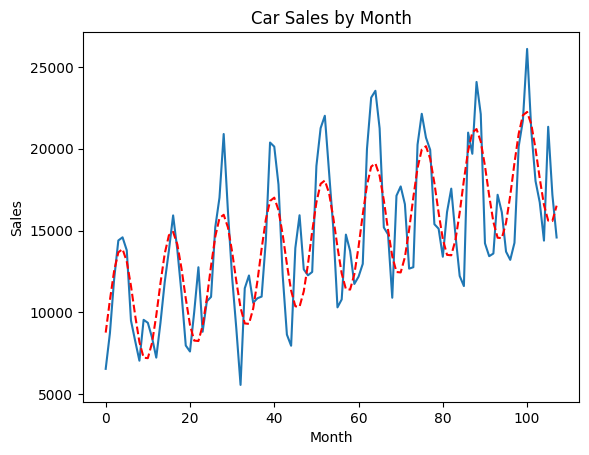

In [ ]:
#n this snippet, we define sine and cosine transformations of the period
#variable, and then we fit a regression that uses these new variables
#as predictors.

import math
carsales['sin_period']=carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period']=carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:,['period','sin_period','cos_period']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)

plt.plot(carsales['period'],carsales['sales'])
plt.plot(x,regressor_trig.predict(x_trig),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
#verify that this trigonometric curve has a lower RMSE than the straight line

trig_line=regressor_trig.predict(x_trig)[:, 0]
print(get_rmse(trig_line,saleslist))

2680.5520744410464


In [ ]:
# Choosing the Best Regression to Use for Forecasting

#The natural temptation is to keep looking for new regression specifications
#that have lower and lower RMSEs. For example, let’s try a new regression
#specification that includes seven prediction terms to forecast sales, and find
#the RMSE for that model

carsales['squareroot']=carsales['period'].apply(lambda x: x**0.5)
carsales['exponent15']=carsales['period'].apply(lambda x: x**1.5)
carsales['log']=carsales['period'].apply(lambda x: math.log(x+1))

x_complex = carsales.loc[:,['period','log','sin_period','cos_period', \
'squareroot','exponent15','log','quadratic', 'cubic']].values.reshape(-1,9)
y = carsales['sales'].values.reshape(-1,1)

regressor_complex = LinearRegression()
regressor_complex.fit(x_complex,y)

complex_line=[prediction for sublist in regressor_complex.predict(x_complex) \
for prediction in sublist]
print(get_rmse(complex_line,saleslist))

2610.3938122978843


In [ ]:
#we split the data into two sets: a training set and a test set. We
#use the training set to train the data (to fit a regression line). We can
#then use the test set to test how well our regression performs.

x_complex_train = carsales.loc[0:80,['period','log','sin_period','cos_period','squareroot', \
'exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_train = carsales.loc[0:80,'sales'].values.reshape(-1,1)

x_complex_test = carsales.loc[81:107,['period','log','sin_period','cos_period','squareroot', \
'exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_test = carsales.loc[81:107,'sales'].values.reshape(-1,1)

regressor_complex.fit(x_complex_train, y_train)

x_train = carsales.loc[0:80,['period']].values.reshape(-1,1)
x_test = carsales.loc[81:107,['period']].values.reshape(-1,1)
x_trig_train = carsales.loc[0:80,['period','sin_period','cos_period']].values.reshape(-1,3)
x_trig_test = carsales.loc[81:107,['period','sin_period','cos_period']].values.reshape(-1,3)

regressor.fit(x_train, y_train)
regressor_trig.fit(x_trig_train, y_train)

complex_test_predictions=[prediction for sublist in \
  regressor_complex.predict(x_complex_test) for prediction in sublist]
test_predictions=[prediction for sublist in regressor.predict(x_test) for \
  prediction in sublist]
trig_test_predictions=[prediction for sublist in \
  regressor_trig.predict(x_trig_test) for prediction in sublist]

print(get_rmse(test_predictions,saleslist[81:107]))
print(get_rmse(trig_test_predictions,saleslist[81:107]))
print(get_rmse(complex_test_predictions,saleslist[81:107]))

#This complex model shows a particularly bad example of overfitting.
#In this common machine learning problem, a model is too complex and
#fits the data’s noise and coincidences instead of the data’s true patterns.
#Overfitting often happens when our attempts to get low errors on a training
#set lead to us getting much higher errors on a test set.

4115.614379193304
3461.0823292599357
6006.013164062921


Summary:
---

We began this chapter with a common business scenario: a company needs to decide how much new inventory it should order. We used linear regression as
our main forecasting tool, and we looked a little at the programming side of it (how to write code for regression), the statistical side of it (which error metrics we can use to determine a model’s goodness of fit), and the math side of it (why our particular line is the best-fit line). After we went through all these
aspects of the problem, we arrived at a model that we thought was best, which we could use to obtain a forecast of next month’s consumer demand.


This scenario—considering a business problem and using programming, mathematical theory, and common sense to find a data-driven solution—is typical of data science. In the remaining chapters, we’ll examine other business scenarios and talk about how to use data science to find ideal solutions to them. In the next chapter, we’ll go over data distributions and show how to test two groups to see whether they’re significantly different from each other.